In [1]:
# It will be useful to have math functions like sqrt() and erf()
from math import *

# This import is needed for norm.cdf() and norm.pdf()
from scipy.stats import norm

In [2]:
# For IQs scaled to mu=100, sigma=15, this line of code shows the
# percentiles for IQs at -1 sigma, +1 sigma, +2 sigma, 99th percentile, 
# 99.5th percentile, +3 sigma, 99.9th percentile, and +4 sigma
norm.cdf([85, 115, 130, 135, 139, 140, 143, 145, 146, 160], 100, 15)

array([0.15865525, 0.84134475, 0.97724987, 0.99018467, 0.99533881,
       0.99616962, 0.9979259 , 0.9986501 , 0.9989177 , 0.99996833])

In [3]:
# The Prometheus Society website "equates" 1 in 30,000 selectivity, 
# 4 sigma in the unselected population (160 IQ), and the 99.997th percentile. 
print("Percentile for 1 in 30000=", 1 - 1/30000)
print("Percentile for 4 sigma: ", norm.cdf(160, 100, 15))
print("Direct percentile stated: 0.99997")

Percentile for 1 in 30000= 0.9999666666666667
Percentile for 4 sigma:  0.9999683287581669
Direct percentile stated: 0.99997


In [4]:
# The precision target we use is the range of the highest to lowest values "equated" by Prometheus Society.
print("Precision target:", 0.99997 - (1-1/30000))

Precision target: 3.3333333333551707e-06


In [5]:
def search_for_mean_and_SD(a, F_a, b, F_b):
    # Initial state of having not found the mean and sd that  
    # A) has the closest match of F_a and CDF(mean, sd, a), and then
    # B) produces the closest match between F_b and CDF(mean, sd, b)
    best_mean_found = 0
    best_sd_found = 0
    best_precision_found = 1

    # Loop through a range of candidate mean values
    for mean in range(200, 400+1):
        # Find the SD that minimizes the difference between F_a and CDF(mean, SD, a)
        best_sd = 15-1
        for sd in range(15, 40+1):
            if (abs(norm.cdf(a, mean, sd) - F_a) < abs(norm.cdf(a, mean, best_sd) - F_a)):
                best_sd = sd
                
        # And then remember the one that also minmizes the difference between F_b and CDF(mean, SD, b)
        if (abs(norm.cdf(b, mean, best_sd) - F_b) < abs(best_precision_found)):
            best_precision_found = norm.cdf(b, mean, best_sd) - F_b
            best_mean_found = mean
            best_sd_found = best_sd
    
    # Print what we found
    return [best_mean_found, best_sd_found]

In [6]:
def print_results(results, a, F_a, b, F_b):
    mean_found = results[0]
    sd_found = results[1]
    if (mean_found > 0):
        print("Best match mean=", mean_found, "and SD=", sd_found)
        print("Precision on lower bound= ", abs(F_a - norm.cdf(a, mean_found, sd_found)))
        print("Precision on upper bound= ", abs(F_b - norm.cdf(b, mean_found, sd_found)))
    else:
        print("Answer not found in grid search")    

In [7]:
results = search_for_mean_and_SD(455, 0.995, 472, 0.999)

In [8]:
# Note that the results are better than the precision target calculated above
print_results(results, 455, 0.995, 472, 0.999)

Best match mean= 370 and SD= 33
Precision on lower bound=  1.0372612480047394e-06
Precision on upper bound=  2.276413712087866e-06


In [9]:
norm.cdf([436, 437, 438, 447, 455, 458, 459, 465, 472, 500, 502, 503], 370, 33)

array([0.97724987, 0.97883713, 0.98032968, 0.99018467, 0.99499896,
       0.99616962, 0.99650132, 0.99800397, 0.99900228, 0.99995916,
       0.99996833, 0.99997215])

In [10]:
# Selectivity of MAT 500 given the best fit mean=370, SD=33
print("Percentile=", norm.cdf(500, 370, 33))
print("Selectivity= 1 in ", 1 / (1 - norm.cdf(500, 370, 33)))

Percentile= 0.9999591561478585
Selectivity= 1 in  24483.488886765368


In [11]:
# Selectivity of MAT 501 given the best fit mean=370, SD=33
print("Percentile=", norm.cdf(501, 370, 33))
print("Selectivity= 1 in ", 1 / (1 - norm.cdf(501, 370, 33)))

Percentile= 0.9999640179519671
Selectivity= 1 in  27791.636515120783


In [12]:
# Selectivity of MAT 502 given the best fit mean=370, SD=33
print("Percentile=", norm.cdf(502, 370, 33))
print("Selectivity= 1 in ", 1 / (1 - norm.cdf(502, 370, 33)))

Percentile= 0.9999683287581669
Selectivity= 1 in  31574.385534647936


### The 2006 MAT Curve (blue) and the Unselected Population Curve Model (yellow)

In [13]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

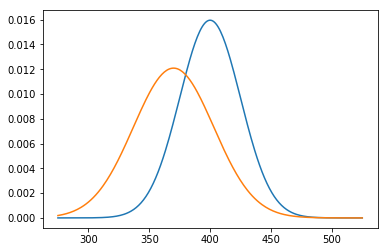

In [14]:
x = np.linspace(275, 525, 250)
for mu, sig in [(400, 25),(370, 33)]:
    plt.plot(x, norm.pdf(x, mu, sig))

plt.show()

Zoom-in on the region where they intersect to show virtual convergence of the two curves in the region around the score of 500. A more exact analysis appears below in the CDF Convergence section.

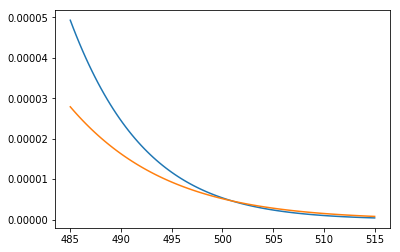

In [15]:
x = np.linspace(485, 515, 100)
for mu, sig in [(400, 25), (370, 33)]:
    plt.plot(x, norm.pdf(x, mu, sig))

plt.show()

### The 2017-18 MAT Curve (blue) and the Unselected Population Curve Model(yellow)

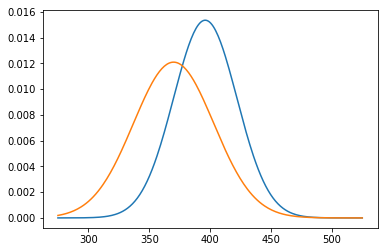

In [16]:
x = np.linspace(275, 525, 250)
for mu, sig in [(396, 26), (370, 33)]:
    plt.plot(x, norm.pdf(x, mu, sig))

plt.show()

Zoom-in on the region where they intersect to show virtual convergence of the two curves in the region around the score of 500. A more exact analysis appears below in the CDF Convergence section.

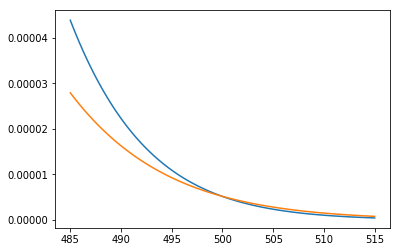

In [17]:
x = np.linspace(485, 515, 100)
for mu, sig in [(396, 26), (370, 33)]:
    plt.plot(x, norm.pdf(x, mu, sig))

plt.show()

## CDF Convergence
The unselected population cumulative distribution or percentile (yellow) intersects with the 2006 MAT cumulative distribution / percentile (blue) at 493.75. After that intersection, the MAT percentile is actually less stringent than the unselected population. To see this, note that the blue line is higher after the intersection point, so the same score along the horizontal axis maps to a higher cumulative percentile than the yellow line representing the unselected population percentiles. This is why a slightly higher score of 502 is required to get the same unselected population percentile as the score of 500 gets in the MAT test taker population. Specifically, at 502, the yellow line of the unselected population rises to the percentile value where the blue line of the MAT population curve was at 500.

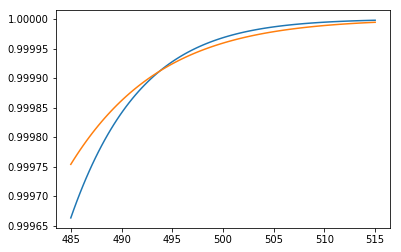

In [18]:
x = np.linspace(485, 515, 100)
for mu, sig in [(400, 25), (370, 33)]:
    plt.plot(x, norm.cdf(x, mu, sig))

plt.show()

In [19]:
print("Convergence at 493.75: ", norm.cdf(493.75, 400, 25), norm.cdf(493.75, 370, 33))

Convergence at 493.75:  0.9999115827147992 0.9999115827147992


In [20]:
# On blue curve, the MAT test takers reach ~99.997th percentile at 500, but...
norm.cdf(500, 400, 25)

0.9999683287581669

In [21]:
# The unselected population curve in yellow is more stringent after the score of 493.75. 
# So, a member of the unselected population reaches the ~99.997th percentile only at 502.
norm.cdf(502, 370, 33)

0.9999683287581669

The 2017-18 MAT curve (blue) also reaches 4 sigma at a score of 500 exactly, but this curve also intersects the unselected population percentile curve near the same location, at around 492 and 4/7ths, and thereafter is also less stringent, i.e. a given MAT score has a higher percentile in the MAT population than in the unselected population after the intersection.  

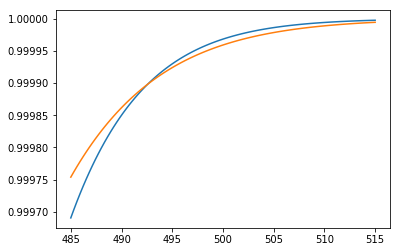

In [22]:
x = np.linspace(485, 515, 100)
for mu, sig in [(396, 26), (370, 33)]:
    plt.plot(x, norm.cdf(x, mu, sig))

plt.show()

In [23]:
# MAT test takers reach ~99.997th percentile at 500, but...
norm.cdf(500, 396, 26)

0.9999683287581669

In [24]:
# As before, a member of the unselected population reaches the ~99.997th percentile at 502.
norm.cdf(502, 370, 33)

0.9999683287581669

In [25]:
norm.cdf(492.57142857143, 396, 26)

0.9998981107702193

In [26]:
norm.cdf(492.57142857143, 370, 33)

0.9998981107702193

## Intertel

In [27]:
norm.cdf(135, 100, 15)

0.9901846713713547

In [28]:
norm.cdf(447, 370, 33)

0.9901846713713547

## IIS

In [29]:
norm.cdf(140, 100, 15)

0.9961696194324102

In [30]:
norm.cdf([458, 459], 370, 33)

array([0.99616962, 0.99650132])

## ePiq

In [31]:
norm.cdf(143, 100, 15)

0.9979259016364059

In [32]:
norm.cdf(465, 370, 33)

0.9980039662714417

## Mensa

In [33]:
norm.cdf(130, 100, 15)

0.9772498680518208

In [34]:
norm.cdf([436, 437, 438], 370, 33)

array([0.97724987, 0.97883713, 0.98032968])

## PDF/CDF/Calculus Diagram

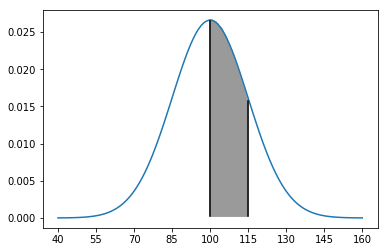

In [35]:
plt.xticks([40,55, 70, 85, 100, 115, 130, 145, 160])
for x in range(100*4, 115*4):
    plt.axvline(x/4, ymin=0.055, 
                ymax=0.955*norm.pdf(x/4, 100, 15)/norm.pdf(100,100,15), color='0.6')
    
x = np.linspace(40, 160, 120)
plt.plot(x, norm.pdf(x, 100, 15))
plt.axvline(100, ymin=0.055, ymax=0.95, color='0')
plt.axvline(115, ymin=0.055, ymax=0.96*norm.pdf(115, 100, 15)/norm.pdf(100,100,15), color='0')
plt.savefig('figure_1.png', dpi=300)
plt.show()

In [36]:
# The area of the shaded region between the mean and +1 sigma
norm.cdf(115, 100, 15) - norm.cdf(100, 100, 15)

0.3413447460685429

## High Resolution Search

In [37]:
# Boundary and step variables that can be manipulated
mean_lbound = 368
mean_ubound = 372
mean_steps = 1000

sd_lbound = 31
sd_ubound = 35
sd_steps = 1000

In [38]:
# High Resolution Search
def hi_res_search_for_mean_and_SD(a, F_a, b, F_b, progress_meter=0):
    if (progress_meter):
        print_hi_res_search_params()
    
    # Initial state of having not found the mean and sd that  
    # A) has the closest match of F_a and CDF(mean, sd, a), and then
    # B) produces the closest match between F_b and CDF(mean, sd, b)
    best_mean_found = 0
    best_sd_found = 0
    best_precision_found = 1

    # Loop through a range of candidate mean values
    for mean_step in range(mean_lbound*mean_steps, mean_ubound*mean_steps+1):
        mean = mean_step / mean_steps
        
        if (progress_meter > 0):
            if (mean_step % (mean_steps/progress_meter) == 0):
                print("Mean=", mean)
        
        # Find the SD that minimizes the difference between F_a and CDF(mean, SD, a)
        best_sd = sd_lbound - 1
        for sd_step in range(sd_lbound*sd_steps, sd_ubound*sd_steps+1):
            sd = sd_step / sd_steps
            
            if (abs(CDF(a, mean, sd) - F_a) < abs(CDF(a, mean, best_sd) - F_a)):
                best_sd = sd
                
        # And then remember the one that also minmizes the difference between F_b and CDF(mean, SD, b)
        if (abs(CDF(b, mean, best_sd) - F_b) < abs(best_precision_found)):
            best_precision_found = CDF(b, mean, best_sd) - F_b
            best_mean_found = mean
            best_sd_found = best_sd
    
    # Print what we found
    return [best_mean_found, best_sd_found]

def print_hi_res_search_params():
    print("High resolution search params:")
    print("mean lbound=", mean_lbound)
    print("mean ubound=", mean_ubound)
    print("mean steps=", mean_steps)
    print("sd lbound=", sd_lbound)
    print("sd ubound=", sd_ubound)
    print("sd steps=", sd_steps)

# Optimized CDF function
def CDF(x, mean, stddev):
    """Computes cumulative distribution function (CDF), which is the
       percentile or area under the normal curve from -infinity to x
       For single number inputs only, but it runs a little faster than 
       100 times faster than norm.cdf(x, mean, stddev)
    """
    return 0.5 * (1 + erf((x - mean)/sqrt(2 * stddev**2)))

In [39]:
results = hi_res_search_for_mean_and_SD(455, 0.995, 472, 0.999, 10)

High resolution search params:
mean lbound= 368
mean ubound= 372
mean steps= 1000
sd lbound= 31
sd ubound= 35
sd steps= 1000
Mean= 368.0
Mean= 368.1
Mean= 368.2
Mean= 368.3
Mean= 368.4
Mean= 368.5
Mean= 368.6
Mean= 368.7
Mean= 368.8
Mean= 368.9
Mean= 369.0
Mean= 369.1
Mean= 369.2
Mean= 369.3
Mean= 369.4
Mean= 369.5
Mean= 369.6
Mean= 369.7
Mean= 369.8
Mean= 369.9
Mean= 370.0
Mean= 370.1
Mean= 370.2
Mean= 370.3
Mean= 370.4
Mean= 370.5
Mean= 370.6
Mean= 370.7
Mean= 370.8
Mean= 370.9
Mean= 371.0
Mean= 371.1
Mean= 371.2
Mean= 371.3
Mean= 371.4
Mean= 371.5
Mean= 371.6
Mean= 371.7
Mean= 371.8
Mean= 371.9
Mean= 372.0


In [40]:
print_results(results, 455, 0.995, 472, 0.999)

Best match mean= 369.874 and SD= 33.048
Precision on lower bound=  2.985619196316236e-09
Precision on upper bound=  2.7975188832130016e-10


### Prometheus Bound

In [41]:
CDF(502, 369.874, 33.048)

0.9999680604162706

In [42]:
CDF(160, 100, 15)

0.9999683287581669

In [43]:
abs(CDF(502, 370, 33) - CDF(502, 369.874, 33.048))

2.683418962590167e-07

### ISPE/TNS/OATHS
F_b for b=472

In [44]:
CDF(472, 369.874, 33.048)

0.9990000002797519

### Colloquy
F_a for a=455

In [45]:
CDF(455, 369.874, 33.048)

0.9949999970143808

### Mensa
3 scores for 95th percentile on MAT as reported in the 2017-18 Pearson report

98th percentile / 130 IQ

In [46]:
norm.cdf([436, 437, 438], 369.874, 33.048)

array([0.97729883, 0.97888096, 0.98036878])

In [47]:
norm.cdf(130, 100, 15)

0.9772498680518208

### Intertel
99th percentile / 135 IQ

In [48]:
norm.cdf(135, 100, 15)

0.9901846713713547

In [49]:
norm.cdf(447, 369.874, 33.048)

0.9901957741630776

### IIS
99.63rd percentile / 140 IQ

In [50]:
norm.cdf(140, 100, 15)

0.9961696194324102

In [51]:
norm.cdf([458, 459], 369.874, 33.048)

array([0.99616893, 0.99650022])

In [52]:
norm.cdf(140, 100, 15) - norm.cdf(458, 369.874, 33.048)

6.897183257859041e-07

### ePiq
99.8th percentile / 143 IQ

In [53]:
norm.cdf(143, 100, 15)

0.9979259016364059

In [54]:
norm.cdf(465, 369.874, 33.048)

0.9980016321840026

## Estimates of Mean and SD for Population of Grad School Applicants

In [55]:
norm.cdf([400, 425, 450, 475, 500], 370, 33)

array([0.81834893, 0.95220965, 0.99232982, 0.99926823, 0.99995916])

In [56]:
norm.cdf([113.63636363, 125, 136.36363636, 147.72727272, 159.09090909], 100, 15)

array([0.81834893, 0.95220965, 0.99232982, 0.99926823, 0.99995916])

In [57]:
[125-113.63636363, 136.36363636-125, 147.72727272-136.363636, 159.09090909-147.72727272]

[11.363636369999995,
 11.363636359999987,
 11.363636719999988,
 11.363636369999995]